In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# REFER TO data.md
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Skirt", "Sneaker", "Bag", "Ankle boot"]

f = open("d.txt", "r+")
for i in train_images[0]:
    f.write(f.read()+f"{i}")
f.close()
print(train_labels[0])

9


In [5]:
# IMAGE SIZE
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.9927 - accuracy: 0.6918
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6453 - accuracy: 0.7576
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5694 - accuracy: 0.8033
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5347 - accuracy: 0.8148
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5237 - accuracy: 0.8204
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5126 - accuracy: 0.8246
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5071 - accuracy: 0.8262
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4921 - accuracy: 0.8320
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4881 - accuracy: 0.8332
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.491

In [6]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [7]:
print(predictions[0])
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}%\n(Correct label: {})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[1.5094691e-10 6.0496719e-11 4.2791814e-21 9.2689420e-13 1.6724868e-30
 5.4139424e-02 1.1738407e-15 1.2782760e-01 4.9669202e-10 8.1803304e-01]


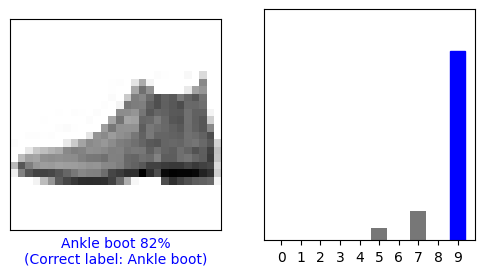

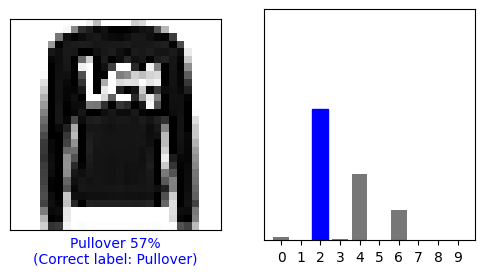

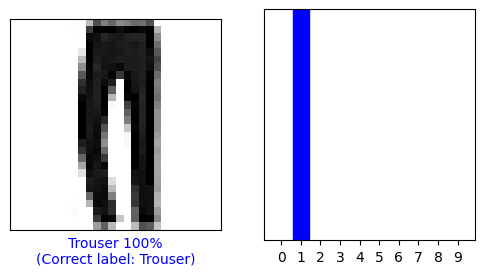

In [8]:
for i in range(3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()